In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

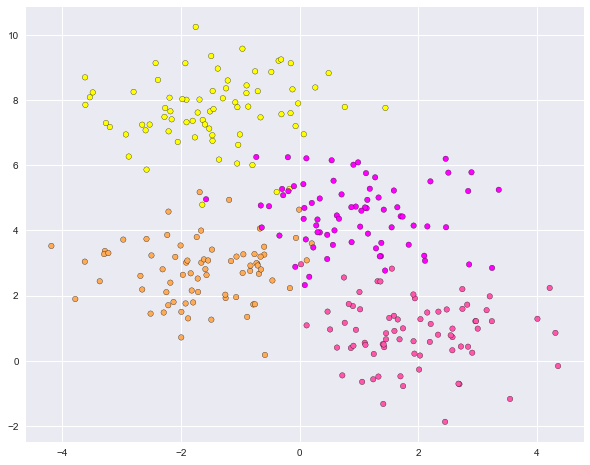

In [35]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, 
                 random_state=0, cluster_std=1.0)
plt.subplots(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k", lw=.3, cmap="spring")

In [36]:
def visualize_tree(estimator, X, y, boundaries=True,
                   xlim=None, ylim=None):
    estimator.fit(X, y)

    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    x_min, x_max = xlim
    y_min, y_max = ylim
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10,8))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='rainbow')
    plt.clim(y.min(), y.max())

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40,edgecolors="k",
                lw=.3,cmap='rainbow')
    plt.axis('off')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    plt.clim(y.min(), y.max())
    
    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i < 0:
            return

        tree = estimator.tree_
        
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

In [37]:
def plot_tree_interactive(X, y):
    from sklearn.tree import DecisionTreeClassifier

    def interactive_tree(depth=1):
        clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
        visualize_tree(clf, X, y)

    from IPython.html.widgets import interact
    return interact(interactive_tree, depth=[1,2,3,4,5])

In [38]:
plot_tree_interactive(X,y)

A Jupyter Widget

<function __main__.plot_tree_interactive.<locals>.interactive_tree>

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

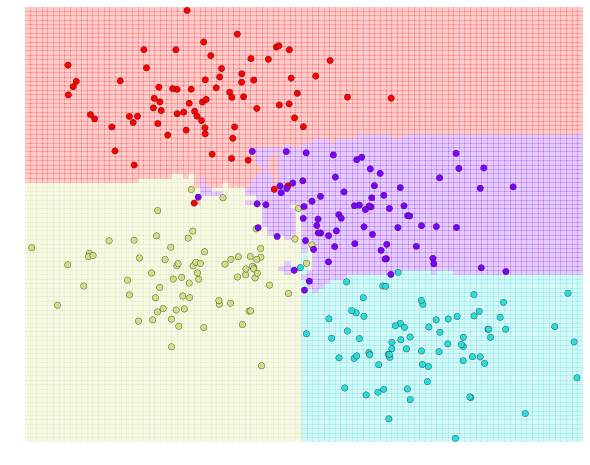

In [10]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_tree(model, X, y, boundaries=False)

<Container object of 3 artists>

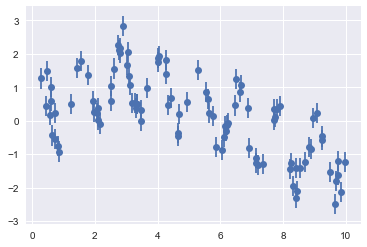

In [11]:
from sklearn.ensemble import RandomForestRegressor

x = 10* np.random.rand(100)

def model(x, sigma=.3):
    fast_oscillation = np.sin(x*5)
    slow_oscillation = np.sin(.5*x)
    noise = sigma*np.random.randn(len(x))
    
    return slow_oscillation + fast_oscillation+ noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt="o")

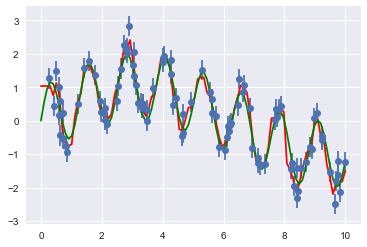

In [12]:
xfit = np.linspace(0,10,100)
yfit = RandomForestRegressor(100).fit(x.reshape(-1,1), y).predict(xfit.reshape(-1,1))

ytrue = model(xfit, 0)

plt.errorbar(x,y,.3,fmt="o")
plt.plot(xfit, yfit,"r")
plt.plot(xfit, ytrue, "green")

In [13]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [14]:
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


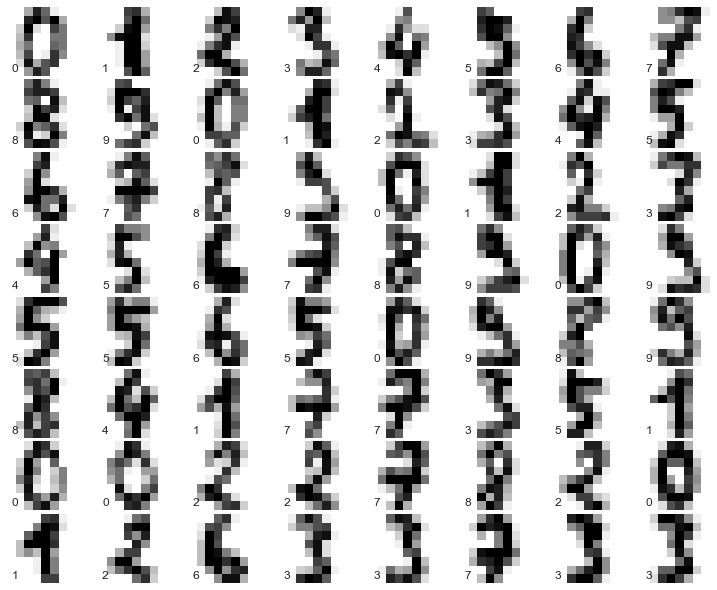

In [15]:
fig, axes = plt.subplots(8,8,figsize=(10,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=.05, wspace=.05)

for i, ax in enumerate(axes.flatten()):
    ax.imshow(digits.images[i], cmap="binary", interpolation="nearest")
    ax.text(0,7,str(digits.target[i]))
    ax.set_xticks([])
    ax.set_yticks([])

In [16]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(digits.data, 
                                                     digits.target,
                                                     random_state=0)
model = DecisionTreeClassifier(max_depth=11)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score( y_pred, y_test)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.8288888888888889

In [17]:
from sklearn.metrics import f1_score
f1_score(y_pred, y_test, average="macro")

0.828638506269052

Text(0,0.5,'true value')

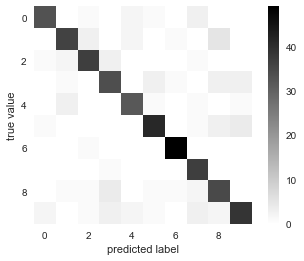

In [18]:
from sklearn.metrics import confusion_matrix
plt.imshow(confusion_matrix(y_pred, y_test), cmap="binary",
           interpolation="nearest")
plt.grid(False)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true value")

In [19]:
model = RandomForestClassifier(max_depth=11, max_features=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy_score(y_pred, y_test)

0.93777777777777782

In [20]:
from sklearn.metrics import f1_score
f1_score(y_pred, y_test, average="macro")

0.93931591725798591

In [21]:
confusion_matrix(y_pred, y_test)

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  3,  0,  1,  0,  1,  1,  4,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  0,  0,  0,  1,  2],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 45,  0,  0,  1,  0],
       [ 1,  1,  0,  0,  0,  1, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 47,  1,  1],
       [ 0,  1,  0,  2,  0,  0,  0,  0, 41,  1],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 43]], dtype=int64)

In [22]:
from sklearn.svm import SVC
model = SVC(kernel="linear", C=10, gamma=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy_score(y_pred, y_test)

0.97111111111111115

In [23]:
confusion_matrix(y_pred, y_test)

from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="macro")

0.97173733531339523

In [24]:
confusion_matrix(y_pred, y_test)

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  1,  0,  3,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 38,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 47,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 44,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 44]], dtype=int64)